<a href="https://colab.research.google.com/github/SadeemAlasiri/Ex_week3/blob/main/Copy_of_DBSCAN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**DBSCAN**


#Step 1 : Import Libraries



In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs # هذه تسمح نسوي داتا لوحدنا
from sklearn.preprocessing import StandardScaler
from sklearn import datasets # هنا تكون موجودهه داخلها داتا

#Step 2 : Prepare dataset
###**use make blobs with different numbers**



In [3]:
clus=[0.60,0.80,1.0,1.30]

In [4]:
X,y_true =make_blobs(n_samples=500,n_features=2,centers=4,random_state=0,cluster_std=clus)

In [5]:
y_true

array([1, 1, 0, 0, 1, 2, 2, 0, 0, 3, 2, 1, 2, 3, 0, 0, 1, 0, 3, 0, 0, 1,
       2, 3, 0, 3, 1, 2, 3, 2, 2, 2, 1, 2, 2, 1, 3, 0, 3, 1, 3, 0, 0, 1,
       2, 1, 0, 0, 1, 1, 3, 3, 2, 0, 0, 2, 2, 3, 3, 1, 1, 3, 1, 1, 1, 2,
       0, 1, 0, 2, 3, 0, 3, 1, 3, 1, 2, 2, 0, 0, 3, 0, 3, 0, 0, 2, 3, 3,
       1, 3, 3, 3, 1, 3, 0, 0, 1, 1, 1, 0, 3, 3, 1, 3, 0, 0, 2, 1, 0, 3,
       3, 2, 3, 3, 1, 3, 1, 0, 2, 1, 0, 3, 1, 1, 3, 1, 1, 1, 1, 3, 0, 3,
       2, 3, 3, 3, 0, 1, 0, 2, 1, 1, 1, 1, 2, 3, 0, 0, 2, 3, 3, 1, 0, 0,
       0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 1, 0, 3, 2, 1, 3, 1, 2, 0, 3,
       0, 3, 3, 3, 1, 1, 1, 0, 2, 3, 2, 1, 2, 3, 1, 2, 3, 2, 2, 3, 0, 2,
       0, 3, 3, 0, 2, 2, 0, 2, 2, 0, 2, 2, 2, 1, 1, 1, 0, 1, 2, 3, 3, 3,
       0, 1, 2, 3, 2, 1, 3, 0, 3, 2, 2, 2, 2, 2, 0, 0, 0, 2, 3, 1, 1, 2,
       2, 1, 3, 3, 0, 1, 0, 0, 0, 2, 1, 3, 0, 3, 3, 2, 3, 2, 0, 0, 1, 3,
       1, 1, 0, 0, 3, 1, 0, 3, 1, 2, 1, 3, 2, 2, 0, 1, 1, 0, 1, 2, 1, 2,
       2, 1, 0, 0, 0, 1, 3, 3, 1, 3, 3, 3, 0, 1, 1,

In [6]:
X

array([[ 2.51808472e+00,  1.17738723e+00],
       [ 3.89840088e+00,  4.96510018e-02],
       [ 1.00372519e+00,  4.19147702e+00],
       [ 2.82560619e-01,  4.77250619e+00],
       [ 1.01004604e+00,  2.22416820e+00],
       [-1.61728602e+00,  4.28547950e+00],
       [ 4.84352668e-01,  2.87328683e+00],
       [ 7.43873988e-01,  4.12240568e+00],
       [ 1.36034899e+00,  3.33361370e+00],
       [-9.51786452e-01,  8.09738395e+00],
       [-2.18696033e+00,  3.09370121e+00],
       [ 1.64125229e+00,  1.14599772e-01],
       [-7.54209176e-01,  1.25628397e+00],
       [-6.74912995e-01,  8.06789074e+00],
       [ 1.54592256e+00,  4.35631807e+00],
       [ 1.15521298e+00,  5.09961887e+00],
       [ 2.75043831e+00,  1.11916118e+00],
       [ 7.89338559e-01,  4.33748653e+00],
       [-2.35107245e+00,  7.41208971e+00],
       [ 1.01618041e+00,  4.48527047e+00],
       [ 3.55724373e-01,  4.71274404e+00],
       [ 2.91007504e+00,  5.34955017e-01],
       [-1.90205113e+00,  1.69168607e+00],
       [-2.

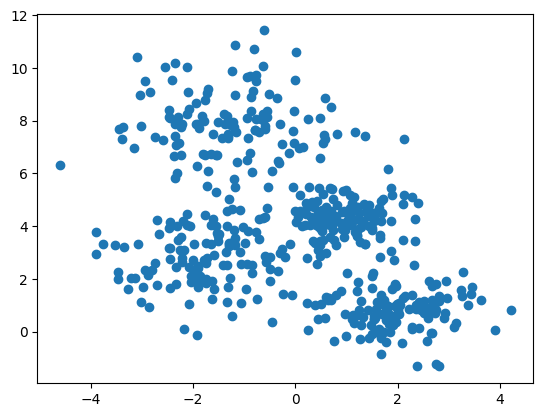

In [7]:
plt.scatter(X[:,0],X[:,1]);# هنا ترسم النقاط من كل عامود و صف

#Step 3 : Modeling The Data Using DBSCAN



In [8]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

In [9]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

['y', 'b', 'g', 'r']


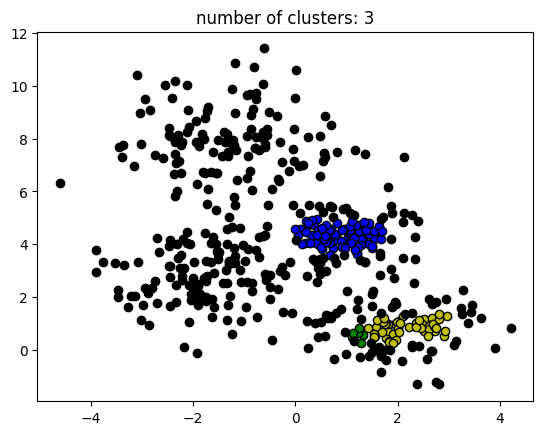

In [10]:
unique_labels = set(labels)
colors = ['y', 'b', 'g', 'r']
print(colors)
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = 'k'

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k',
             markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

#Step 4 : Evaluation Metrics For DBSCAN Algorithm In Machine Learning


In [11]:
from sklearn import metrics
sc = metrics.silhouette_score(X, labels)
print("Silhouette Coefficient:%0.2f" % sc)
ari = metrics.adjusted_rand_score(y_true, labels) # Import adjusted_rand_score
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient:-0.07
Adjusted Rand Index: 0.19


#**Well Done :)**